In [225]:
import tensorflow as tf

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [247]:
PATH = './Images'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, '')

In [248]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [279]:
batch_size = 64
epochs = 42
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [280]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
  directory = train_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
val_data_gen = validation_image_generator.flow_from_directory(
  directory = validation_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
test_data_gen = test_image_generator.flow_from_directory(
  directory = test_dir,
  classes = ['test'],
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
  shuffle = False
)

Found 128 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 9 images belonging to 1 classes.


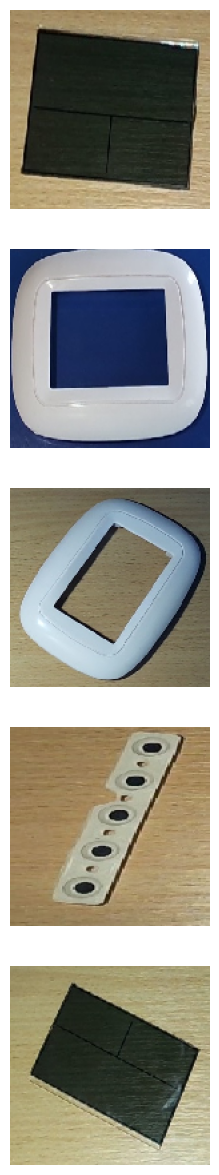

In [281]:
def plotImages(images_arr, probabilities = False, labels = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax, label in zip( images_arr, probabilities, axes, labels):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{label} - {'%.3f'%(probability*100)}")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Found 128 images belonging to 4 classes.


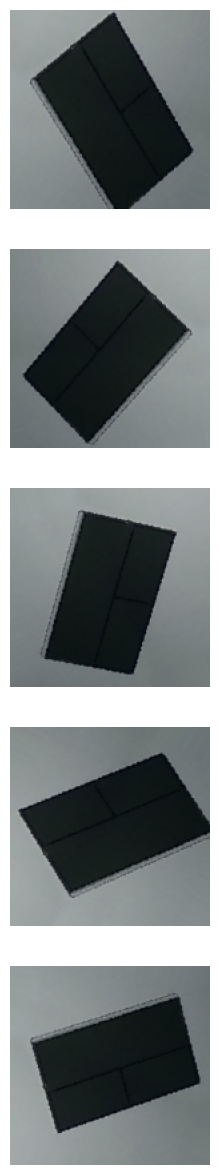

In [282]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = [0.9, 1.1],
    shear_range = 0.2
)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [283]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))
    

Found 128 images belonging to 4 classes.


In [289]:
model = Sequential()
model.add(Conv2D(64, (6,6), padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D(4,4))
model.add(Flatten())
model.add(Dense(64, input_dim=745))
model.add(Dense(64, input_dim=745))
model.add(Dropout(.1))
model.add(Dense(4, activation='softmax'))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()


Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_119 (Conv2D)         (None, 150, 150, 64)      6976      
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 flatten_45 (Flatten)        (None, 87616)             0         
                                                                 
 dense_114 (Dense)           (None, 64)                5607488   
                                                                 
 dense_115 (Dense)           (None, 64)                4160      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                     

In [284]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_117 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_118 (Conv2D)         (None, 34, 34, 64)        36928     
                                                                 
 flatten_44 (Flatten)        (None, 73984)           

In [290]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                    label_smoothing=0.0,
                                                    axis=-1),
    metrics = ['accuracy']
    )

In [291]:
history = model.fit(
    x = train_data_gen,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch = 1,
    validation_data = val_data_gen,
    validation_steps = 1
    )

Epoch 1/42
1/1 [==============================] - 2s 2s/step - loss: 1.4218 - accuracy: 0.2656 - val_loss: 18.2341 - val_accuracy: 0.2778
Epoch 2/42
1/1 [==============================] - 1s 1s/step - loss: 17.9741 - accuracy: 0.2656 - val_loss: 11.6810 - val_accuracy: 0.4444
Epoch 3/42
1/1 [==============================] - 1s 878ms/step - loss: 11.9778 - accuracy: 0.4219 - val_loss: 3.8249 - val_accuracy: 0.3056
Epoch 4/42
1/1 [==============================] - 1s 916ms/step - loss: 3.9830 - accuracy: 0.3281 - val_loss: 3.6745 - val_accuracy: 0.3889
Epoch 5/42
1/1 [==============================] - 1s 884ms/step - loss: 3.4587 - accuracy: 0.4844 - val_loss: 2.6033 - val_accuracy: 0.3611
Epoch 6/42
1/1 [==============================] - 1s 887ms/step - loss: 2.5793 - accuracy: 0.3438 - val_loss: 1.3291 - val_accuracy: 0.4167
Epoch 7/42
1/1 [==============================] - 1s 853ms/step - loss: 1.2954 - accuracy: 0.5156 - val_loss: 0.9819 - val_accuracy: 0.7778
Epoch 8/42
1/1 [======

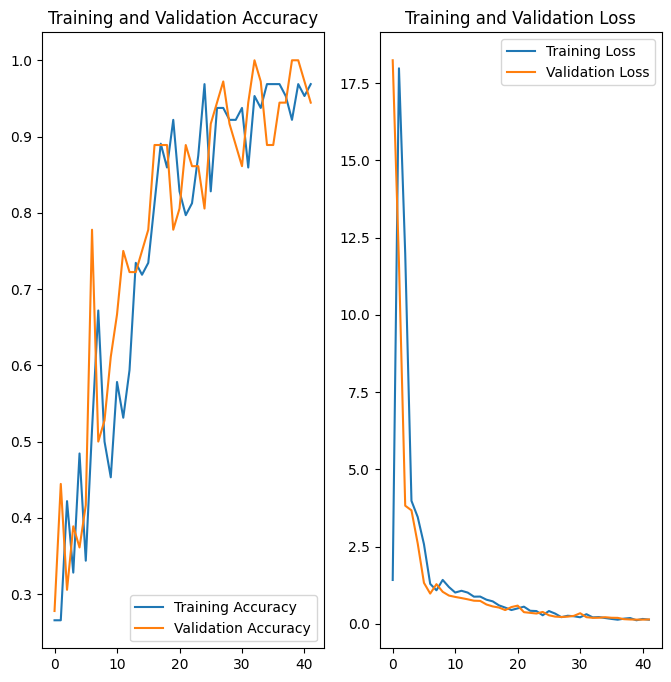

In [292]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [136]:
#save model

model.save('./saved_model/test.h5')

In [75]:
model = tf.keras.models.load_model('saved_model/test.h5')
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 150, 150, 32)      3488      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 43808)             0         
                                                                 
 dense_45 (Dense)            (None, 32)                1401888   
                                                                 
 dense_46 (Dense)            (None, 32)                1056      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                     

1/1 [==============================] - 0s 94ms/step


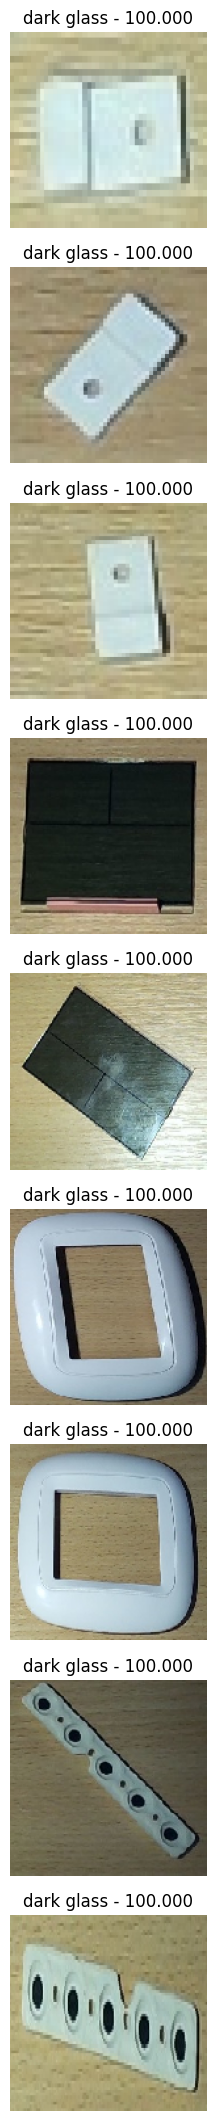

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 2.7367062e-24 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 6.1666538e-38 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [288]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_gen)

test_images, _ = next(test_data_gen)

predictionPercent = []
predictionLabel = []
name = ["clip", "dark glass", "frame", "strip"]
for i in range(len(predictions)):
    value = 0
    category = 0
    for j in range(len(predictions[i])):
        if predictions[i][j] > value:
            value = predictions[i][j]
            category = j
    predictionPercent.append(value)
    predictionLabel.append(name[category])

plotImages(test_images, predictionPercent, predictionLabel)
print(predictions)